# estimate numba over heads

In [3]:
from numba import njit ,types as nbt, typeof, from_dtype
from numba.experimental import jitclass
import numpy as np
from timeit import timeit
from time import perf_counter
from typing import NamedTuple



@njit
def F1(a, index):
    s= 0.
    for n in index:
        s += a[n]
    return s

@njit(nbt.float64(nbt.float64[:],nbt.int32[:] ))
def F1s(a, index):
    s= 0.
    for n in index:
        s += a[n]
    return s

@njit
def F2(a,b, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]
    return s

@njit(nbt.float64(nbt.float64[:],nbt.float64[:], nbt.int32[:] ))
def F2s(a,b, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]
    return s

@njit
def F5(a,b,c,d,e, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n]
    return s

@njit([nbt.float64(nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.int32[:] )])
def F5s(a,b,c,d,e, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n]
    return s

@njit
def F10(a,b,c,d,e,f,g,h,i,j, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n] + f[n]+ g[n]+ h[n]+ i[n]+ j[n]
    return s

@njit(nbt.float64(nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.float64[:],
                  nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.float64[:],nbt.float64[:],
                  nbt.int32[:] ))
def F10s(a,b,c,d,e,f,g,h,i,j, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n] + f[n]+ g[n]+ h[n]+ i[n]+ j[n]
    return s

repeats = 100
n_fields = [1,10]
n_particles = np.asarray([ 10**2,500, 10**3,10**4,10**5,10**6,10**7],dtype=np.int32)
N = n_particles.size

t1= np.zeros((N,),dtype=np.float64)
t1s= np.zeros((N,),dtype=np.float64)

t2= np.zeros((N,),dtype=np.float64)
t2s= np.zeros((N,),dtype=np.float64)

t5= np.zeros((N,),dtype=np.float64)
t5s= np.zeros((N,),dtype=np.float64)

t10= np.zeros((N,),dtype=np.float64)
t10s= np.zeros((N,),dtype=np.float64)
frac = 0.5

for n ,n_part in enumerate(n_particles):
    
    a = np.zeros((n_part,), dtype=np.float64)
    active = np.sort(np.random.choice(np.arange(n_part), size=int(n_part*frac), replace=False)).astype(np.int32)
    print('n_part', n_part,active.size)
    #  base case
   
    F1(a,active)
    t1[n]=  timeit(lambda  : F1(a,active),  number =repeats) 

    F1s(a,active)
    t1s[n]=  timeit(lambda  : F1s(a,active),  number =repeats)  

    F2(a,a,active)
    t2[n]=  timeit(lambda  : F2(a,a, active),  number =repeats) 

    F2s(a,a, active)
    t2s[n]=  timeit(lambda  : F2s(a, a, active),  number =repeats) 

    F5(a,a,a,a,a,active)
    t5[n]=  timeit(lambda  :  F5(a,a,a,a,a,active),  number =repeats) 

    F5s(a,a,a,a,a,active)
    t5s[n]=  timeit(lambda  :  F5s(a,a,a,a,a,active),  number =repeats)  

    F10(a,a,a,a,a,a,a,a,a,a,active)
    t10[n]=  timeit(lambda  :  F10(a,a,a,a,a,a,a,a,a,a,active),  number =repeats) 

    F10s(a,a,a,a,a,a,a,a,a,a,active)
    t10s[n]=  timeit(lambda  :  F10s(a,a,a,a,a,a,a,a,a,a,active),  number =repeats)  
       
        
 


n_part 100 50
n_part 500 250
n_part 1000 500
n_part 10000 5000
n_part 100000 50000
n_part 1000000 500000
n_part 10000000 5000000


Text(0.5, 0, 'loop count')

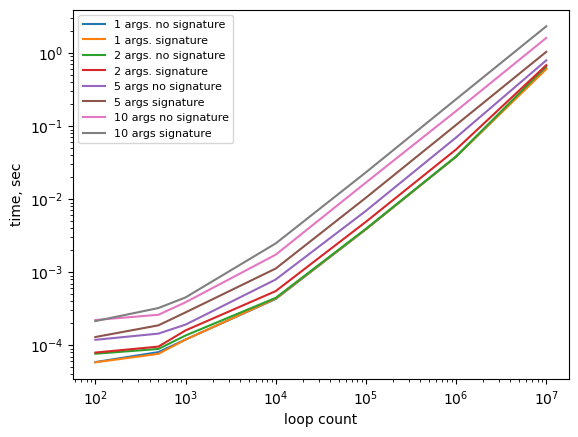

In [4]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()

ax.plot(n_particles,t1,label =f'1 args. no signature')
ax.plot(n_particles,t1s,label = f'1 args. signature')

ax.plot(n_particles,t2,label =f'2 args. no signature')
ax.plot(n_particles,t2s,label = f'2 args. signature')

ax.plot(n_particles,t5,label =f'5 args no signature')
ax.plot(n_particles,t5s,label = f'5 args signature')

ax.plot(n_particles,t10,label =f'10 args no signature')
ax.plot(n_particles,t10s,label = f'10 args signature')

plt.xscale('log')
plt.yscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('time, sec')
ax.set_xlabel('loop count')

# using sifvate slower 

Text(0.5, 0, 'loop count')

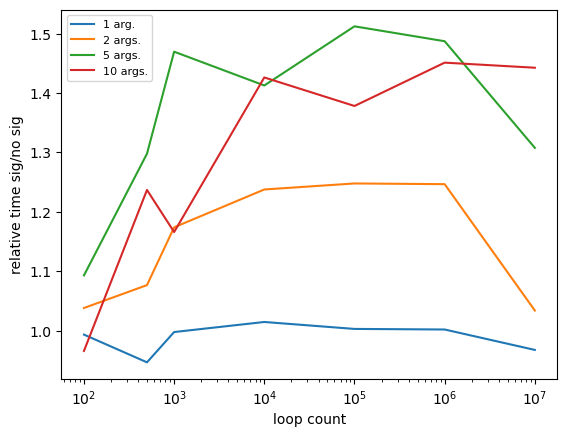

In [5]:
fig,ax = plt.subplots()
ax.plot(n_particles,t1s/t1,label =f'1 arg.')
ax.plot(n_particles,t2s/t2,label =f'2 args.')
ax.plot(n_particles,t5s/t5,label =f'5 args.')
ax.plot(n_particles,t10s/t10,label =f'10 args.')
ax.set_xscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('relative time sig/no sig')
ax.set_xlabel('loop count')

Text(0.5, 0, 'loop count')

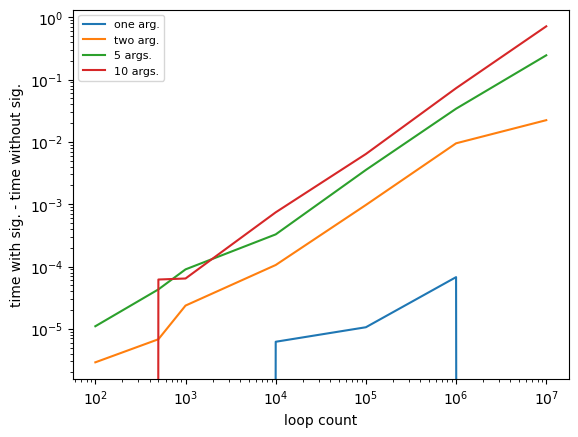

In [6]:
fig,ax = plt.subplots()
ax.plot(n_particles, t1s-t1,label =f'one arg.')
ax.plot(n_particles,t2s -t2,label =f'two arg.')
ax.plot(n_particles,t5s-t5,label =f'5 args.')
ax.plot(n_particles,t10s-t10,label =f'10 args.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('time with sig. - time without sig.')
ax.set_xlabel('loop count')

[5.87000031e-05 7.63999997e-05 1.18500000e-04 2.21399998e-04]
[8.04000010e-05 8.89000003e-05 1.44099999e-04 2.61099995e-04]
[0.0001196 0.0001358 0.0001915 0.0003871]
[0.0004296 0.0004451 0.0007943 0.0017375]
[0.0038618 0.0039244 0.0069201 0.0168987]
[0.0381788 0.0384708 0.069907  0.1610997]
[0.6237574 0.6623403 0.7964606 1.6151635]


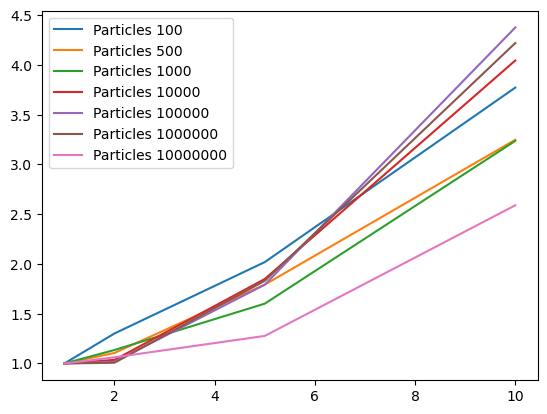

In [7]:
# look at effect of argument numbers, no signature
# stack redsults
t = np.stack((t1,t2,t5,t10),axis=1).T
#print(t.shape, t)
args= np.asarray([1, 2, 5, 10])
fig,ax = plt.subplots()

for n in range(t.shape[1]):
    print(t[:,n])
    ax.plot(args,t[:,n]/t[0,n] , label =f'Particles {n_particles[n]}')
#ax.plot(args, t,label =f'one arg.')
#ax.set_yscale('log')

ax.legend()


In [8]:
t10[-1],t10s[-1]



(1.6151634999987436, 2.3297706999946968)